The object of this project is to find out what features is important to live a happy life. So we can focus on more important stuff. Also predict the happiness score and compare the result to discover which algorithm works better.

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import plotly
from bubbly.bubbly import bubbleplot 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


## Cleaning

In [2]:
data2017 = pd.read_csv('./world-happiness-report/2017.csv')
data2016 = pd.read_csv('./world-happiness-report/2016.csv')
data2015 = pd.read_csv('./world-happiness-report/2015.csv')

In [3]:
print(data2017.head())
data2017.shape

       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0 

(155, 12)

In [4]:
print(data2016.head())
data2016.shape

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

(157, 13)

In [5]:
print(data2015.head())
data2015.shape

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

(158, 12)

In [6]:
data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
data2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [8]:
data2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [9]:
del data2015['Standard Error']
print(data2015.shape)
data2015.head()

(158, 11)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
del data2016['Lower Confidence Interval']
del data2016['Upper Confidence Interval']
print(data2016.shape)
data2016.tail()

(157, 11)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [11]:
del data2017['Whisker.high']
del data2017['Whisker.low']
print(data2017.shape)
data2017.head()

(155, 10)


,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [12]:
countryDF = data2016.loc[:,'Country':'Region']
countryDF.head()

,Country,Region
0,Denmark,Western Europe
1,Switzerland,Western Europe
2,Iceland,Western Europe
3,Norway,Western Europe
4,Finland,Western Europe


In [13]:
out = (countryDF.merge(data2017, left_on='Country', right_on='Country').reindex(columns=['Country', 'Region','Happiness.Rank', 'Happiness.Score','Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual']))

In [14]:
out.head()

,Country,Region,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
1,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [15]:
out.columns.value_counts().sum()

11

In [16]:
out.sort_values(by='Happiness.Rank', ascending=True, inplace=True)

In [17]:
out = out.reset_index()

In [18]:
del out['index']

In [19]:
data2017.tail()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [20]:
out.head()

,Country,Region,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [21]:
data2017 = out

In [22]:
data2017.tail()

,Country,Region,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
145,Togo,Sub-Saharan Africa,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229
146,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
147,Syria,Middle East and Northern Africa,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
148,Tanzania,Sub-Saharan Africa,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
149,Burundi,Sub-Saharan Africa,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [23]:
data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [24]:
data2015.rename(index=str, columns={"Happiness Rank":"Happiness_Rank", "Happiness Score":"Happiness_Score", "Economy (GDP per Capita)":"Economy", "Health (Life Expectancy)":"Life_Expectancy", "Trust (Government Corruption)":"Government_Corruption", "Dystopia Residual": "Dystopia_Residual"}, inplace=True)

In [25]:
data2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
data2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [27]:
data2016.rename(index=str, columns={"Happiness Rank":"Happiness_Rank", "Happiness Score":"Happiness_Score", "Economy (GDP per Capita)":"Economy", "Health (Life Expectancy)":"Life_Expectancy", "Trust (Government Corruption)":"Government_Corruption", "Dystopia Residual": "Dystopia_Residual"}, inplace=True)

In [28]:
data2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [29]:
data2017.columns

Index(['Country', 'Region', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

In [30]:
data2017.rename(index=str, columns={"Happiness.Rank":"Happiness_Rank", "Happiness.Score":"Happiness_Score", "Economy..GDP.per.Capita.":"Economy", "Health..Life.Expectancy.":"Life_Expectancy", "Trust..Government.Corruption.":"Government_Corruption", "Dystopia.Residual": "Dystopia_Residual"}, inplace=True)

In [31]:
data2017.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Life_Expectancy,Freedom,Generosity,Government_Corruption,Dystopia_Residual
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [32]:
# data2017['Region'].isnull().value_counts()
data2017['Region'].notnull().value_counts()

True    150
Name: Region, dtype: int64

In [33]:
data2016['Region'].isnull().value_counts()

False    157
Name: Region, dtype: int64

In [34]:
data2015['Region'].isnull().value_counts()

False    158
Name: Region, dtype: int64

# 2015-2016

In [35]:
# 1. Contains in 15 but not in 16
df2016_2015 = pd.concat([data2015['Country'],data2016['Country']]).drop_duplicates(keep=False)
print(df2016_2015)

# Same as

# 2. Contains in 16 but not in 15
# dfNotin2015_2016 = pd.concat([data2016['Country'],data2015['Country']]).drop_duplicates(keep=False)
# print(dfNotin2015_2016)

21                         Oman
90            Somaliland region
93                   Mozambique
96                      Lesotho
100                   Swaziland
125                    Djibouti
147    Central African Republic
14                  Puerto Rico
51                       Belize
75                      Somalia
96            Somaliland Region
112                     Namibia
142                 South Sudan
Name: Country, dtype: object


In [36]:
df2016_2015 = df2016_2015.tolist() 
print(df2016_2015)

['Oman', 'Somaliland region', 'Mozambique', 'Lesotho', 'Swaziland', 'Djibouti', 'Central African Republic', 'Puerto Rico', 'Belize', 'Somalia', 'Somaliland Region', 'Namibia', 'South Sudan']


In [37]:
availableIn2016butNotin2015 = pd.DataFrame()
availableIn2015butNotin2016 = pd.DataFrame()

In [38]:
for i in range(len(df2016_2015)):
    if(df2016_2015[i] in data2015['Country'].values):
        availableIn2015butNotin2016 = availableIn2015butNotin2016.append(data2015[data2015['Country']==df2016_2015[i]])
        print(df2016_2015[i] + ' available in 2015 but not in 2016')
    elif(df2016_2015[i] in data2016['Country'].values):
        availableIn2016butNotin2015 = availableIn2016butNotin2015.append(data2016[data2016['Country']==df2016_2015[i]])
        print(df2016_2015[i] + ' available in 2016 but not in 2015')

Oman available in 2015 but not in 2016
Somaliland region available in 2015 but not in 2016
Mozambique available in 2015 but not in 2016
Lesotho available in 2015 but not in 2016
Swaziland available in 2015 but not in 2016
Djibouti available in 2015 but not in 2016
Central African Republic available in 2015 but not in 2016
Puerto Rico available in 2016 but not in 2015
Belize available in 2016 but not in 2015
Somalia available in 2016 but not in 2015
Somaliland Region available in 2016 but not in 2015
Namibia available in 2016 but not in 2015
South Sudan available in 2016 but not in 2015


In [39]:
print(availableIn2015butNotin2016.columns.value_counts())
print(availableIn2016butNotin2015.columns.value_counts())

Region                   1
Economy                  1
Country                  1
Happiness_Rank           1
Government_Corruption    1
Freedom                  1
Generosity               1
Happiness_Score          1
Life_Expectancy          1
Family                   1
Dystopia_Residual        1
dtype: int64
Region                   1
Economy                  1
Country                  1
Happiness_Rank           1
Government_Corruption    1
Freedom                  1
Generosity               1
Happiness_Score          1
Life_Expectancy          1
Family                   1
Dystopia_Residual        1
dtype: int64


In [40]:
# Add missing values in 2015
print('Before Adding')
print(data2015.shape)
print(data2015.columns)

print('After Adding')
data2015 = pd.concat([data2015,availableIn2016butNotin2015])
data2015.reset_index(drop=True, inplace=True)
print(data2015.shape)

Before Adding
(158, 11)
Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Economy',
       'Family', 'Life_Expectancy', 'Freedom', 'Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')
After Adding
(164, 11)


In [41]:
print('Before Adding')
print(data2016.shape)
print(data2015.shape)

print('After Adding')
data2016 = pd.concat([data2016,availableIn2015butNotin2016])
data2016.reset_index(drop=True, inplace=True)
print(data2016.shape)

Before Adding
(157, 11)
(164, 11)
After Adding
(164, 11)


# 2015-2017

In [42]:
# 3. Check values which contains in 17 but not in 15
df2015_2017 = pd.concat([data2017['Country'],data2015['Country']]).drop_duplicates(keep=False)
print(df2015_2017)

# # Same

# # 4. Contains in 15 but not in 17
# # dfNotin2017_2015 = pd.concat([data2015['Country'],data2017['Country']]).drop_duplicates(keep=False)
# # print(dfNotin2017_2015.shape)

21                         Oman
37                       Taiwan
39                     Suriname
71                    Hong Kong
90            Somaliland region
93                   Mozambique
96                      Lesotho
98                         Laos
100                   Swaziland
125                    Djibouti
139                     Comoros
147    Central African Republic
158                 Puerto Rico
161           Somaliland Region
Name: Country, dtype: object


In [43]:
df2015_2017 = df2015_2017.tolist()
print(df2015_2017)

['Oman', 'Taiwan', 'Suriname', 'Hong Kong', 'Somaliland region', 'Mozambique', 'Lesotho', 'Laos', 'Swaziland', 'Djibouti', 'Comoros', 'Central African Republic', 'Puerto Rico', 'Somaliland Region']


In [44]:
availableIn2015butNotin2017 = pd.DataFrame()
availableIn2017butNotin2015 = pd.DataFrame()

In [45]:
for i in range(len(df2015_2017)):
    if(df2015_2017[i] in data2015['Country'].values):
        availableIn2015butNotin2017 = availableIn2015butNotin2016.append(data2015[data2015['Country']==df2015_2017[i]])
        print(df2015_2017[i] + ' available in 2015 but not in 2017')
    elif(df2015_2017[i] in data2017['Country'].values):
        availableIn2017butNotin2015 = availableIn2016butNotin2015.append(data2017[data2017['Country']==df2015_2017[i]])
        print(df2015_2017[i] + ' available in 2017 but not in 2015')

Oman available in 2015 but not in 2017
Taiwan available in 2015 but not in 2017
Suriname available in 2015 but not in 2017
Hong Kong available in 2015 but not in 2017
Somaliland region available in 2015 but not in 2017
Mozambique available in 2015 but not in 2017
Lesotho available in 2015 but not in 2017
Laos available in 2015 but not in 2017
Swaziland available in 2015 but not in 2017
Djibouti available in 2015 but not in 2017
Comoros available in 2015 but not in 2017
Central African Republic available in 2015 but not in 2017
Puerto Rico available in 2015 but not in 2017
Somaliland Region available in 2015 but not in 2017


In [46]:
# print(availableIn2017butNotin2015.columns.value_counts())
print(availableIn2015butNotin2017.columns.value_counts())

Region                   1
Economy                  1
Country                  1
Happiness_Rank           1
Government_Corruption    1
Freedom                  1
Generosity               1
Happiness_Score          1
Life_Expectancy          1
Family                   1
Dystopia_Residual        1
dtype: int64


In [47]:
# Add missing values in 2015
print('Before Adding')
print(data2017.shape)
print(data2017.columns)

print('After Adding')
data2017 = pd.concat([data2017,availableIn2015butNotin2017])
data2017.reset_index(drop=True, inplace=True)
print(data2017.shape)

Before Adding
(150, 11)
Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Economy',
       'Family', 'Life_Expectancy', 'Freedom', 'Generosity',
       'Government_Corruption', 'Dystopia_Residual'],
      dtype='object')
After Adding
(158, 11)


/home/debadatta/opt/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




# 2017-16

In [48]:
# 5. Contains in 16 but not in 17
df2017_2016 = pd.concat([data2016['Country'],data2017['Country']]).drop_duplicates(keep=False)
print(df2017_2016)

# # Same

# # 6. Contains in 17 but not in 16
# # dfNotin2016_2017 = pd.concat([data2017['Country'],data2016['Country']]).drop_duplicates(keep=False)
# # print(dfNotin2016_2017.shape)

14     Puerto Rico
34          Taiwan
39        Suriname
74       Hong Kong
101           Laos
137        Comoros
Name: Country, dtype: object


In [49]:
df2017_2016 = df2017_2016.tolist()
print(df2017_2016)

['Puerto Rico', 'Taiwan', 'Suriname', 'Hong Kong', 'Laos', 'Comoros']


In [50]:
availableIn2017butNotin2016 = pd.DataFrame()
availableIn2016butNotin2017 = pd.DataFrame()

In [51]:
for i in range(len(df2017_2016)):
    if(df2017_2016[i] in data2016['Country'].values):
        availableIn2016butNotin2017 = availableIn2016butNotin2017.append(data2016[data2016['Country']==df2017_2016[i]])
        print(df2017_2016[i] + ' available in 2016 but not in 2017')
    elif(df2017_2016[i] in data2017['Country'].values):
        availableIn2017butNotin2016 = availableIn2017butNotin2016.append(data2017[data2017['Country']==df2017_2016[i]])
        print(df2017_2016[i] + ' available in 2017 but not in 2016')

Puerto Rico available in 2016 but not in 2017
Taiwan available in 2016 but not in 2017
Suriname available in 2016 but not in 2017
Hong Kong available in 2016 but not in 2017
Laos available in 2016 but not in 2017
Comoros available in 2016 but not in 2017


In [52]:
print(availableIn2016butNotin2017)

         Country                       Region  Happiness_Rank  \
14   Puerto Rico  Latin America and Caribbean              15   
34        Taiwan                 Eastern Asia              34   
39      Suriname  Latin America and Caribbean              40   
74     Hong Kong                 Eastern Asia              75   
101         Laos            Southeastern Asia             102   
137      Comoros           Sub-Saharan Africa             138   

     Happiness_Score  Economy   Family  Life_Expectancy  Freedom  \
14             7.039  1.35943  1.08113          0.77758  0.46823   
34             6.379  1.39729  0.92624          0.79565  0.32377   
39             6.269  1.09686  0.77866          0.50933  0.52234   
74             5.458  1.51070  0.87021          0.95277  0.48079   
101            4.876  0.68042  0.54970          0.38291  0.52168   
137            3.956  0.27509  0.60323          0.29981  0.15412   

     Government_Corruption  Generosity  Dystopia_Residual  
14     

In [53]:
df2017_2016[0]

'Puerto Rico'

In [54]:
data2016[data2016['Country']=='Puerto Rico']

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
14,Puerto Rico,Latin America and Caribbean,15,7.039,1.35943,1.08113,0.77758,0.46823,0.12275,0.22202,3.0076


In [55]:
# Add missing values in 2015
print('Before Adding')
print(data2017.shape)
print(data2017.columns)

print('After Adding')
data2017 = pd.concat([data2017,availableIn2016butNotin2017])
data2017.reset_index(drop=True, inplace=True)
print(data2017.shape)

Before Adding
(158, 11)
Index(['Country', 'Dystopia_Residual', 'Economy', 'Family', 'Freedom',
       'Generosity', 'Government_Corruption', 'Happiness_Rank',
       'Happiness_Score', 'Life_Expectancy', 'Region'],
      dtype='object')
After Adding
(164, 11)


/home/debadatta/opt/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




# Final Data

In [56]:
data2015.shape

(164, 11)

In [57]:
data2016.shape

(164, 11)

In [58]:
data2017.shape

(164, 11)

# Feature Engineering

In [59]:
data2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Yearly Regionwise Economy vs Happiness Score

## 2015

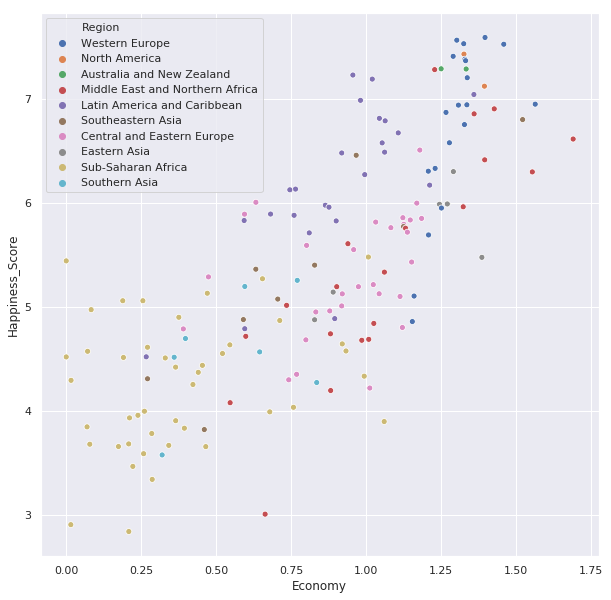

In [60]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot('Economy', 'Happiness_Score',hue='Region', data=data2015)

## 2016

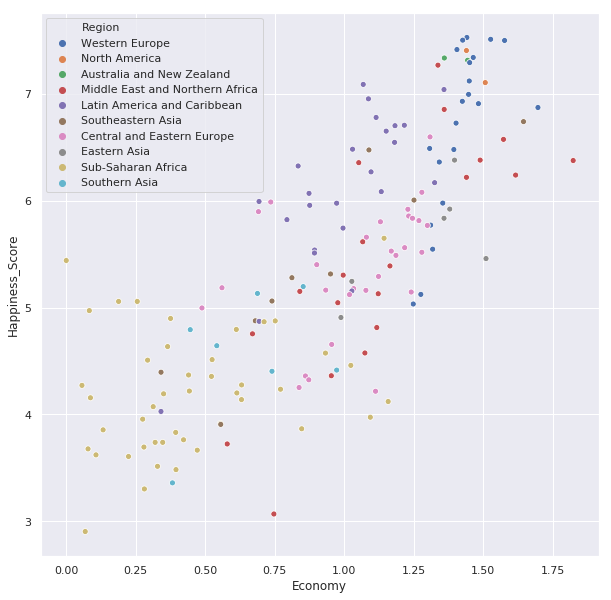

In [61]:
sns.scatterplot('Economy', 'Happiness_Score',hue='Region', data=data2016)

## 2017

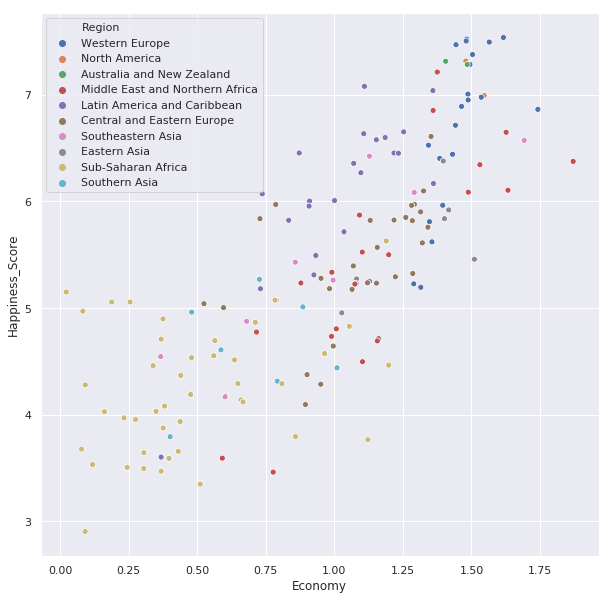

In [62]:
sns.scatterplot('Economy', 'Happiness_Score',hue='Region', data=data2017)

# Correlation

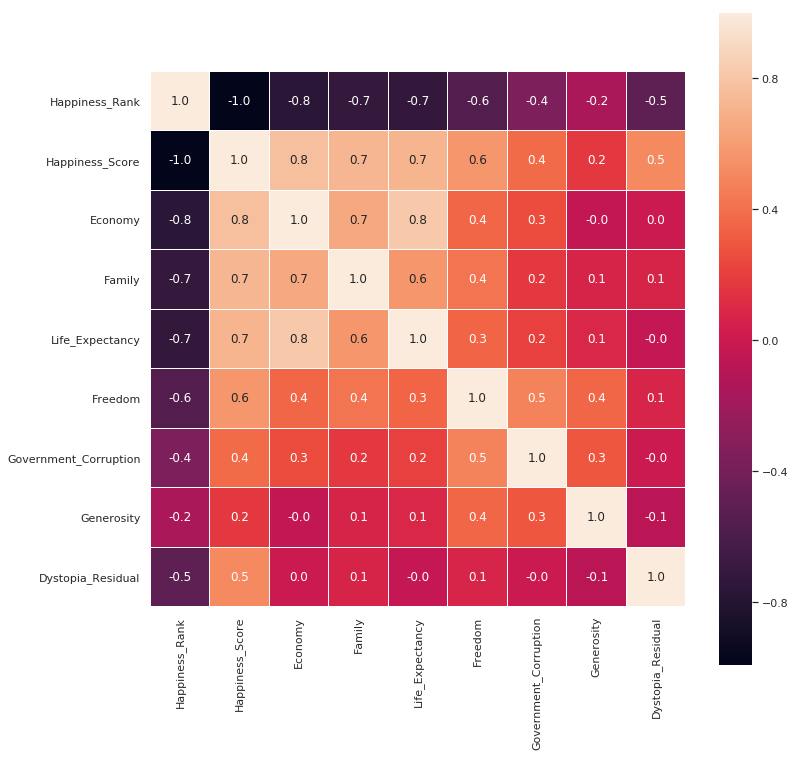

In [63]:
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(data2015.corr(), annot=True, linewidths=0.1, fmt= '.1f', ax=ax, square=True, )

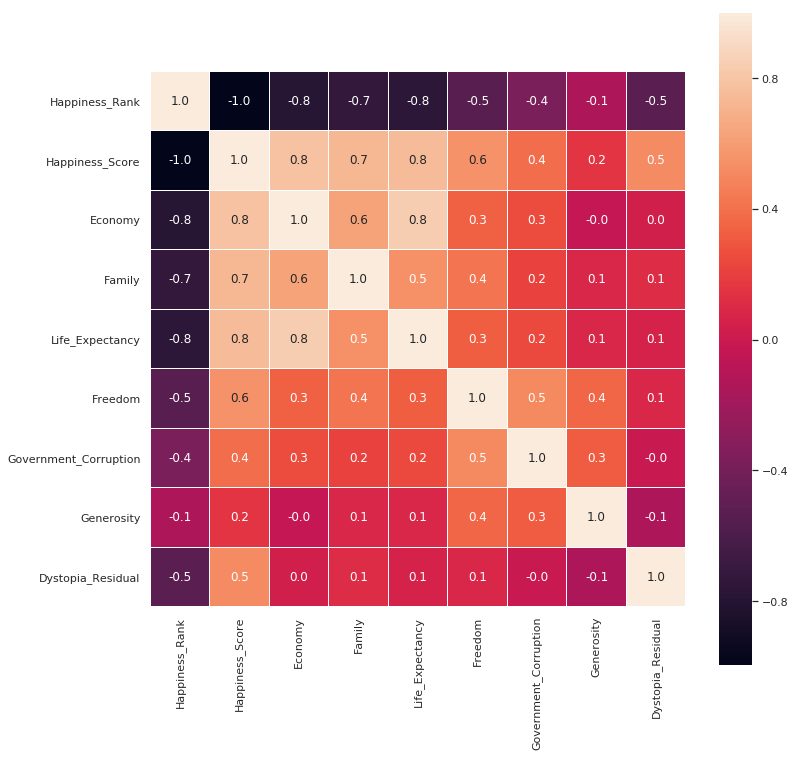

In [64]:
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(data2016.corr(), annot=True, linewidths=0.1, fmt= '.1f', ax=ax, square=True, )

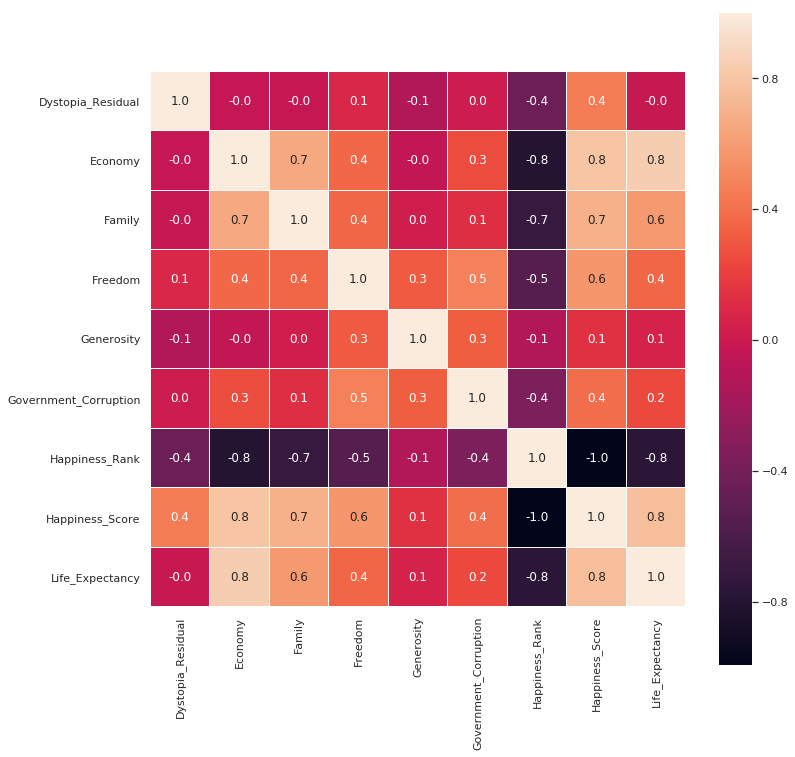

In [65]:
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(data2017.corr(), annot=True, linewidths=0.1, fmt= '.1f', ax=ax, square=True, )

# Word Cloud

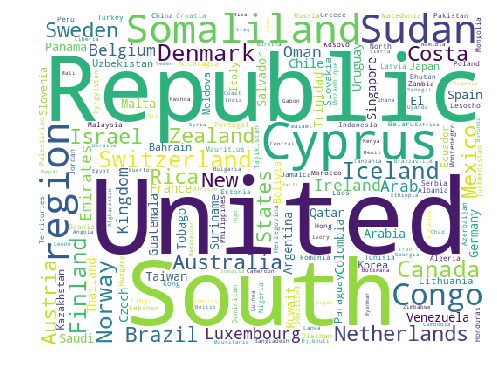

In [66]:
country2015 = data2015['Country']
plt.subplots(figsize=(8,8))
wordCloud = WordCloud(background_color='white', width=512, height=384).generate(" ".join(country2015))

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

# Region Count of Various Countries

In [67]:
data2015.Region.value_counts()

Sub-Saharan Africa                 44
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [68]:
data2016.Region.value_counts()

Sub-Saharan Africa                 44
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [81]:
data2017.Region.value_counts()

array([44, 29, 24, 21, 20,  9,  7,  6,  2,  2])

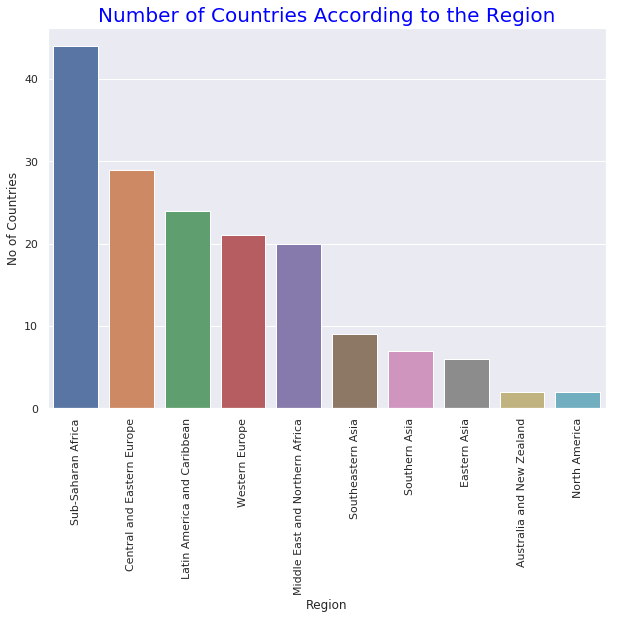

In [74]:
dt2015 = data2015.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=dt2015.index, y=dt2015.values)
plt.xlabel('Region')
plt.ylabel('No of Countries')
plt.xticks(rotation=90)
plt.title('Number of Countries According to the Region', color = 'blue', fontsize = 20)
plt.show()

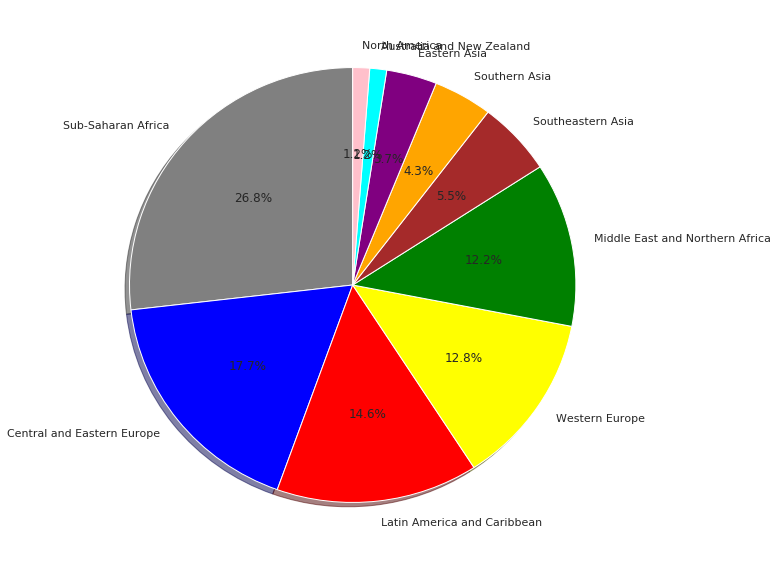

In [87]:
label = data2015.Region.value_counts().index
colors = ['grey', 'blue', 'red', 'yellow', 'green', 'brown', 'orange', 'purple', 'cyan', 'pink']
sizes = data2015.Region.value_counts().values
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(sizes, labels=label, autopct='%1.1f%%',explode=explode,shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.show()

# Regionwise Happiness Score in 2015

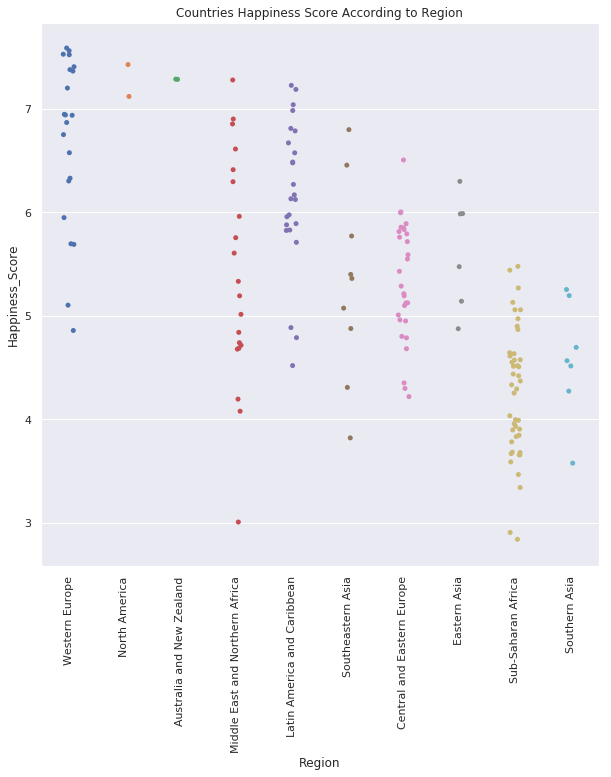

In [88]:
x = sns.stripplot(x='Region', y='Happiness_Score', data=data2015, jitter=True)
plt.xticks(rotation=90)
plt.title('Countries Happiness Score According to Region')
plt.show()

# Countries below and above Average in 2017

In [89]:
data2017.mean()

Dystopia_Residual         1.904558
Economy                   0.967707
Family                    1.164051
Freedom                   0.410012
Generosity                0.248496
Government_Corruption     0.129146
Happiness_Rank           77.798780
Happiness_Score           5.369848
Life_Expectancy           0.545847
dtype: float64

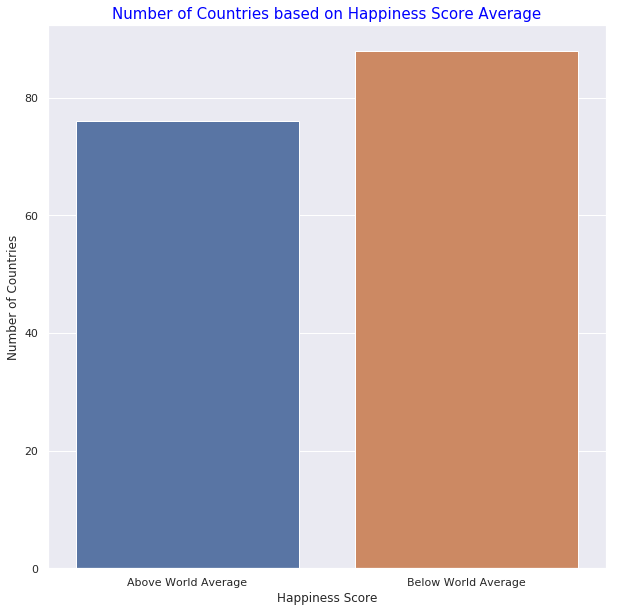

In [93]:
above_mean_HS = ['Above World Average' if i>=5.35 else 'Below World Average' for i in data2017.Happiness_Score]
df = pd.DataFrame({'Happiness_Score': above_mean_HS})
sns.countplot(x=df.Happiness_Score)
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Number of Countries based on Happiness Score Average', color = 'blue', fontsize = 15)
plt.show()